# Direct AWS S3 Access 
## SWOT Simulated Level-2 KaRIn SSH from GLORYS for Science Version 1

PO.DAAC <podaac@podaac.jpl.nasa.gov>


* Data DOI: [10.5067/KARIN-2GLS1](https://podaac.jpl.nasa.gov/dataset/SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1?ids=&values=&search=SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1&provider=POCLOUD)

The following blocks demonstrate the direct S3 access of the simulated SWOT Level-2 SSH based on GLORYS model output. 


In [1]:
#Short_name is used to identify a specific dataset in NASA Earthdata. 
short_name='SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1'

## Direct S3 access

Use EarthData Login (EDL) to get a direct S3 access. Direct S3 access is only available to users running in AWS, us-west-2 region. All other access must come from HTTP requests for PO.DAAC data.

Create an EDL following this [link](https://earthdata.nasa.gov/eosdis/science-system-description/eosdis-components/earthdata-login).

Create a .netrc file in the home folder following [these instructions](https://urs.earthdata.nasa.gov/documentation/for_users/data_access/curl_and_wget).

**.netrc** is essential to enable the following blocks. 

In [2]:
def init_S3FileSystem():
    import requests,s3fs
    s3_cred_endpoint = {
        'podaac':'https://archive.podaac.earthdata.nasa.gov/s3credentials',
        'lpdaac':'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials'}

    temp_creds_url = s3_cred_endpoint['podaac']
    creds = requests.get(temp_creds_url).json()
    s3 = s3fs.S3FileSystem(anon=False,
                           key=creds['accessKeyId'],
                           secret=creds['secretAccessKey'], 
                           token=creds['sessionToken'])
    return s3
s3sys=init_S3FileSystem()

## Explore the file system.

In [4]:
import pprint
import xarray as xr
#s3://podaac-ops-cumulus-protected is the PODAAC S3 bucket. 
#s3://podaac-ops-cumulus-protected/{short_name} is the path to this dataset. 

#This dataset is organized by year.

fns=sorted(s3sys.glob("s3://podaac-ops-cumulus-protected/%s/*Expert_001*nc"%short_name))
pprint.pprint(fns[:3])
print(len(fns))
d=xr.open_dataset(s3sys.open(fns[0]))
d

['podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1/SWOT_L2_LR_SSH_Expert_001_001_20140412T120000_20140412T125126_DG10_01.nc',
 'podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1/SWOT_L2_LR_SSH_Expert_001_002_20140412T125126_20140412T134253_DG10_01.nc',
 'podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1/SWOT_L2_LR_SSH_Expert_001_003_20140412T134253_20140412T143420_DG10_01.nc']
584


<xarray.Dataset>
Dimensions:                                (num_lines: 9866, num_pixels: 71,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 ...
    longitude                              (num_lines, num_pixels) float64 ...
    latitude_nadir                         (num_lines) float64 ...
    longitude_nadir                        (num_lines) float64 ...
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/91)
    time                                   (num_lines) datetime64[ns] ...
    time_tai                               (num_lines) datetime64[ns] ...
    ssh_karin                              (num_lines, num_pixels) float64 ...
    ssh_karin_uncert                       (num_lines, num_pixels) float32 ...
    ssha_karin                             (num_lines, num_pixels) float64 ...
    ssh_karin_2                            (num_lines, num_pixels) float64 ...
    ...                                     ...
    simulated_error_baseline_dilation      (num_lines, num_pixels) float64 ...
    simulated_error_timing                 (num_lines, num_pixels) float64 ...
    simulated_error_roll                   (num_lines, num_pixels) float64 ...
    simulated_error_phase                  (num_lines, num_pixels) float64 ...
    simulated_error_orbital                (num_lines, num_pixels) float64 ...
    simulated_error_karin                  (num_lines, num_pixels) float64 ...
Attributes: (12/32)
    Conventions:                CF-1.7
    title:                      Level 2 Low Rate Sea Surface Height Data Prod...
    institution:                CNES/JPL
    source:                     Simulate product
    history:                    2021-09-10 09:54:55Z : Creation
    platform:                   SWOT
    ...                         ...
    right_last_longitude:       131.81928697472432
    right_last_latitude:        77.03254381435897
    wavelength:                 0.008385803020979
    orbit_solution:             POE
    ellipsoid_semi_major_axis:  6378137.0
    ellipsoid_flattening:       0.003352810664781205

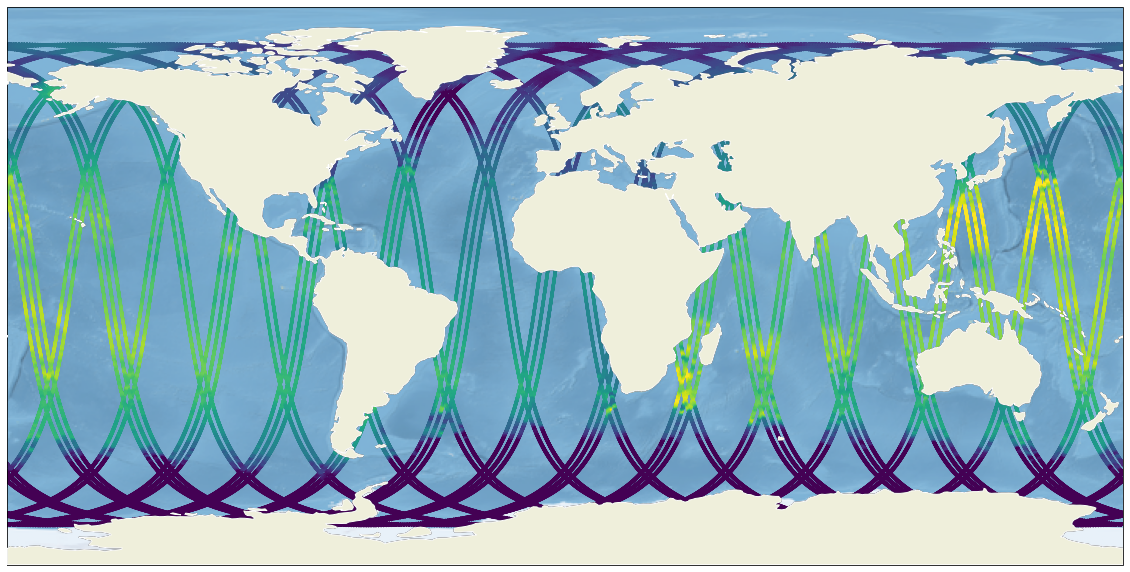

In [18]:
import pylab as plt
import xarray as xr
import numpy as np
from matplotlib import pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cart

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())


for i in range(290):
    fn=fns[i]
    date=fn.split('_')[-4][:10]
    if date<'2014041512':
        d=xr.open_dataset(s3sys.open(fn))
        lon,lat,ssh=d['longitude'][::10,:],d['latitude'][::10,:],d['simulated_true_ssh_karin'][::10,:]
        #ssh=ssh-ssh.mean(axis=-1)
        lon=lon[:,5:30];lon1=lon[:,40:-5]
        lat=lat[:,5:30];lat1=lat[:,40:-5]
        ssh=ssh[:,5:30];ssh1=ssh[:,40:-5]
        plt.scatter(lon,lat,c=ssh,s=1,vmin=-1,vmax=1,transform=ccrs.PlateCarree())
        plt.scatter(lon1,lat1,c=ssh1,s=1,vmin=-1,vmax=1,transform=ccrs.PlateCarree())
        del d,lon,lat,ssh
    #xr.open_dataset(s3sys.open(fns[0]))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='w')
ax.stock_img()
ax.coastlines()
plt.savefig('day_3.png',dpi=200)

In [ ]:
import pylab as plt
import xarray as xr
import numpy as np
from matplotlib import pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cart


fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

for i in range(290):
    fn=fns[i]
    date=fn.split('_')[-4][:10]
    if date<'2014042212':
        d=xr.open_dataset(s3sys.open(fn))
        lon,lat,ssh=d['longitude'][::10,:],d['latitude'][::10,:],d['simulated_true_ssh_karin'][::10,:]
        #ssh=ssh-ssh.mean(axis=-1)
        lon=np.c_[lon[:,5:30],lon[:,40:-5]]
        lat=np.c_[lat[:,5:30],lat[:,40:-5]]
        ssh=np.c_[ssh[:,5:30],ssh[:,40:-5]]
        plt.scatter(lon,lat,s=1,c=ssh,vmin=-1,vmax=1,transform=ccrs.Geodetic())
        del d,lon,lat,ssh
    #xr.open_dataset(s3sys.open(fns[0]))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='w')
ax.stock_img()
ax.coastlines()
plt.savefig('day_10.png',dpi=200)

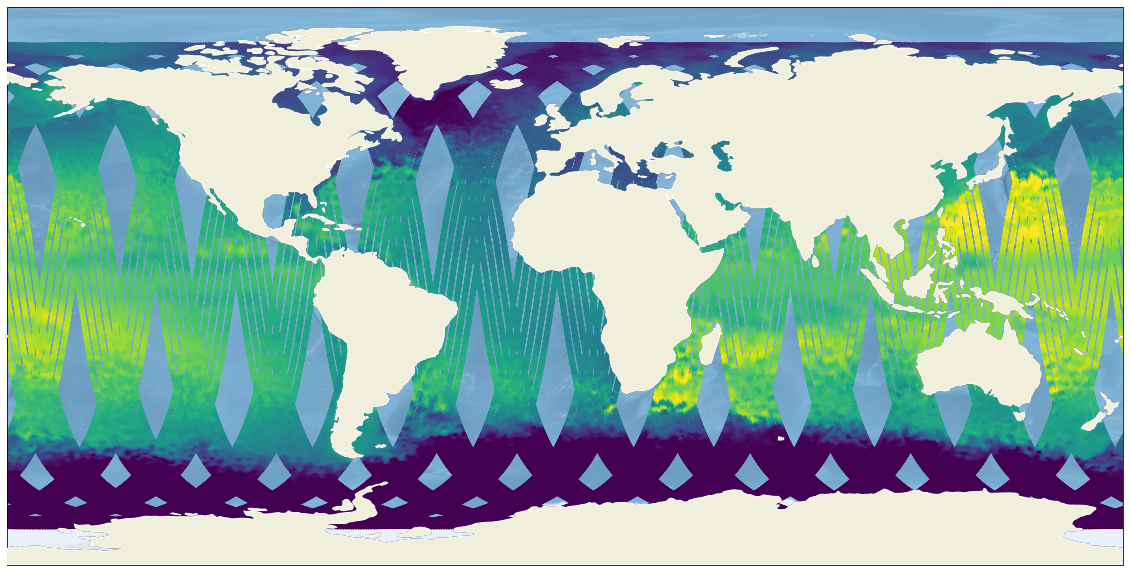

In [9]:
import pylab as plt
import xarray as xr
import numpy as np
from matplotlib import pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cart

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())


for i in range(290):
    fn=fns[i]
    date=fn.split('_')[-4][:10]
    if date<'2014041812':
        d=xr.open_dataset(s3sys.open(fn))
        lon,lat,ssh=d['longitude'][::10,:],d['latitude'][::10,:],d['simulated_true_ssh_karin'][::10,:]
        #ssh=ssh-ssh.mean(axis=-1)
        lon=np.c_[lon[:,5:30],lon[:,40:-5]]
        lat=np.c_[lat[:,5:30],lat[:,40:-5]]
        ssh=np.c_[ssh[:,5:30],ssh[:,40:-5]]
        plt.scatter(lon,lat,s=1,c=ssh,vmin=-1,vmax=1,transform=ccrs.Geodetic())
        del d,lon,lat,ssh
    #xr.open_dataset(s3sys.open(fns[0]))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='w')
ax.stock_img()
ax.coastlines()
plt.savefig('day_06.png',dpi=200)

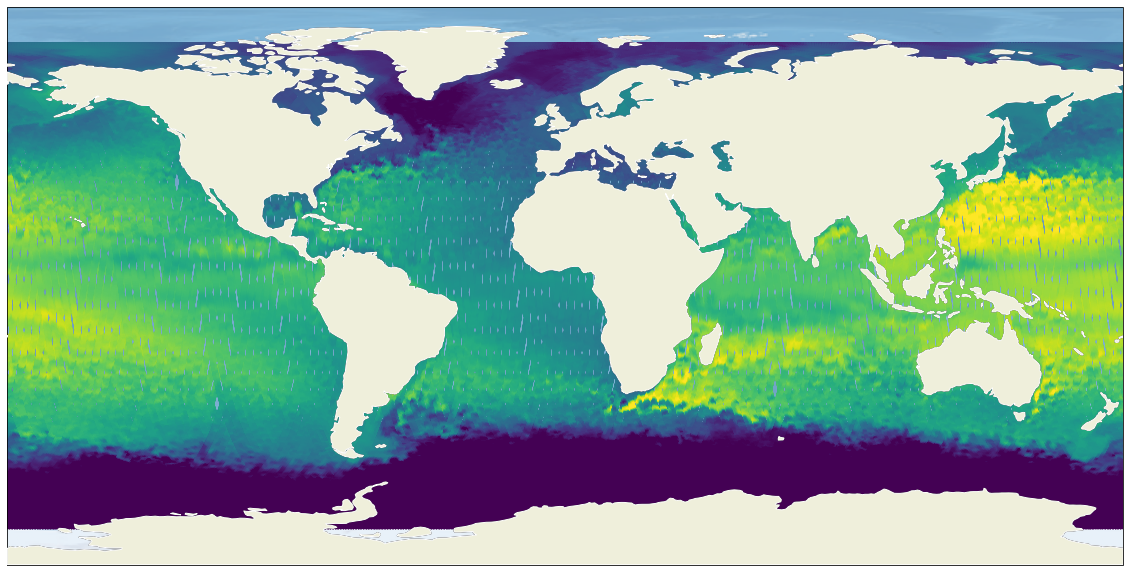

In [10]:
import pylab as plt
import xarray as xr
import numpy as np
from matplotlib import pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cart

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())


for i in range(290):
    fn=fns[i]
    date=fn.split('_')[-4][:10]
    if date<'2014050212':
        d=xr.open_dataset(s3sys.open(fn))
        lon,lat,ssh=d['longitude'][::10,:],d['latitude'][::10,:],d['simulated_true_ssh_karin'][::10,:]
        #ssh=ssh-ssh.mean(axis=-1)
        lon=np.c_[lon[:,5:30],lon[:,40:-5]]
        lat=np.c_[lat[:,5:30],lat[:,40:-5]]
        ssh=np.c_[ssh[:,5:30],ssh[:,40:-5]]
        plt.scatter(lon,lat,s=1,c=ssh,vmin=-1,vmax=1,transform=ccrs.Geodetic())
        del d,lon,lat,ssh
    #xr.open_dataset(s3sys.open(fns[0]))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='w')
ax.stock_img()
ax.coastlines()
plt.savefig('day_21.png',dpi=200)